In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_sample_submission = pd.read_csv("/content/sample_submission.csv")
df.head()

,id,unique_session_id,bounces,time_on_site,pageviews,hits,session_quality_dim,latest_ecommerce_progress,avg_time_per_page,source,medium,channelGrouping,deviceCategory,operatingSystem,browser,country,city,will_buy_on_return_visit
0,0,98463921871485068561470319157,0,2818,68,86,0,6,41.992188,mall.googleplex.com,referral,referral,desktop,macintosh,chrome,canada,toronto,1
1,1,64969931561991723631486389718,0,32,4,4,0,0,8.000000,(direct),NaN,direct,desktop,linux,uc browser,india,kharagpur,1
2,2,2117346273301973411473489944,0,93,8,11,0,2,11.625000,mail.google.com,referral,referral,desktop,chrome os,chrome,united states,san francisco,1
3,3,8934726040229318731481512421,0,265,15,21,0,2,17.333333,lunametrics.com,referral,referral,mobile,android,firefox,australia,sydney,0
4,4,5054831196771327751486859045,1,0,1,1,0,0,NaN,youtube.com,referral,social,desktop,windows,internet explorer,thailand,bangkok,0


In [24]:
# remove "id" and "unique_session_id"
df.drop(columns=["id", "unique_session_id"], inplace=True)
df_test.drop(columns=["id", "unique_session_id"], inplace=True)
df.info()
df_test.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    4000 non-null   int64  
 1   time_on_site               4000 non-null   int64  
 2   pageviews                  4000 non-null   int64  
 3   hits                       4000 non-null   int64  
 4   session_quality_dim        4000 non-null   int64  
 5   latest_ecommerce_progress  4000 non-null   int64  
 6   avg_time_per_page          2724 non-null   float64
 7   source                     4000 non-null   object 
 8   medium                     3404 non-null   object 
 9   channelGrouping            4000 non-null   object 
 10  deviceCategory             4000 non-null   object 
 11  operatingSystem            3984 non-null   object 
 12  browser                    4000 non-null   object 
 13  country                    4000 non-null   objec

,bounces,time_on_site,pageviews,hits,session_quality_dim,latest_ecommerce_progress,avg_time_per_page,will_buy_on_return_visit
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,2724.000000,4000.000000
mean,0.318000,243.913250,7.183750,8.796250,0.95875,1.390750,34.464465,0.502250
std,0.465758,483.536977,10.606866,14.122184,8.39197,2.195511,63.281845,0.500057
min,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.500000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,10.139971,0.000000
50%,0.000000,41.000000,3.000000,3.000000,0.00000,0.000000,20.000000,1.000000
75%,1.000000,247.000000,9.000000,11.000000,0.00000,2.000000,32.967391,1.000000
max,1.000000,5820.000000,194.000000,262.000000,99.00000,6.000000,969.000000,1.000000


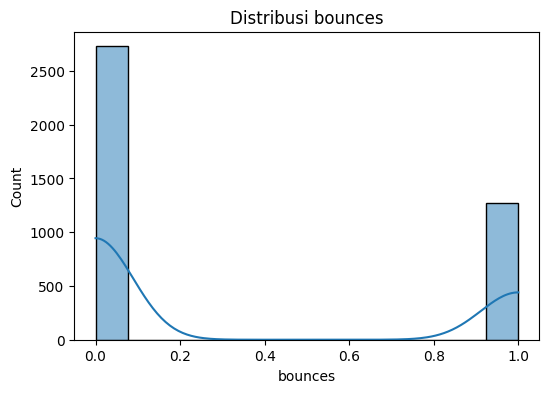

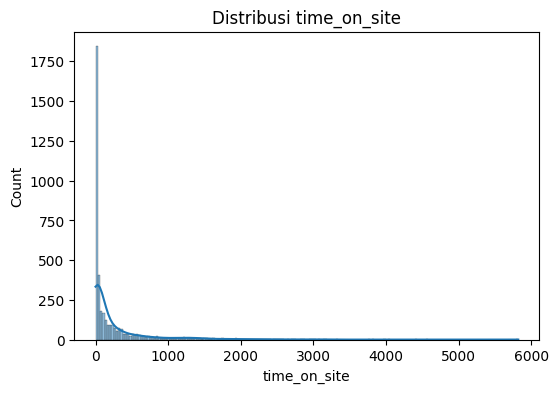

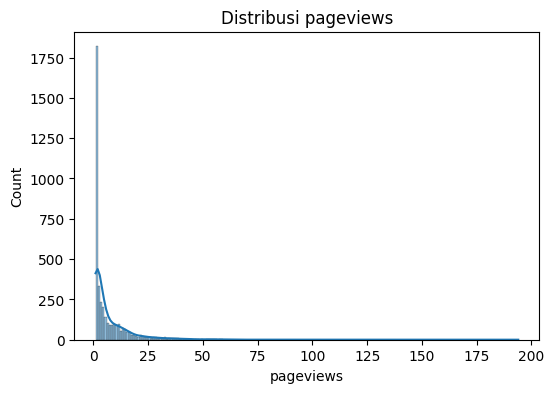

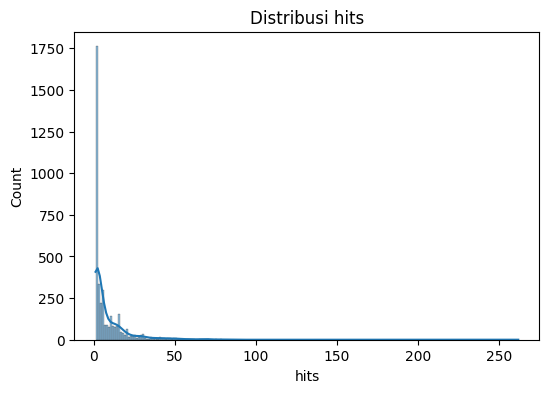

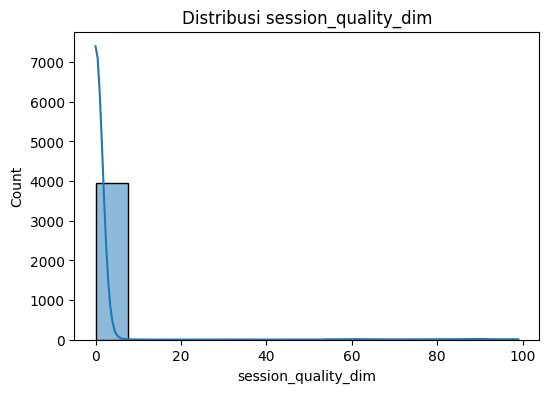

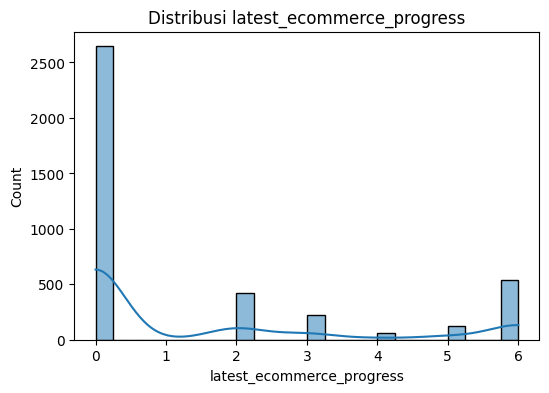

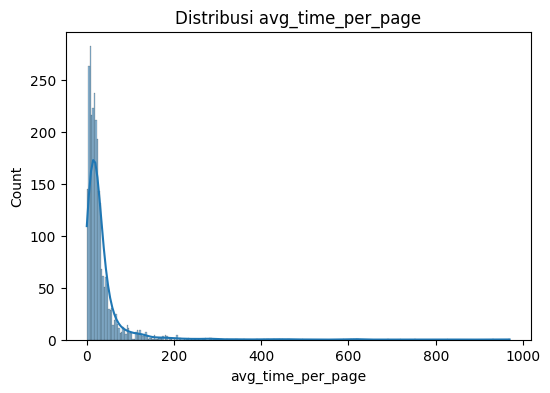

In [25]:
num_cols = ['bounces', 'time_on_site', 'pageviews', 'hits',
            'session_quality_dim', 'latest_ecommerce_progress', 'avg_time_per_page']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

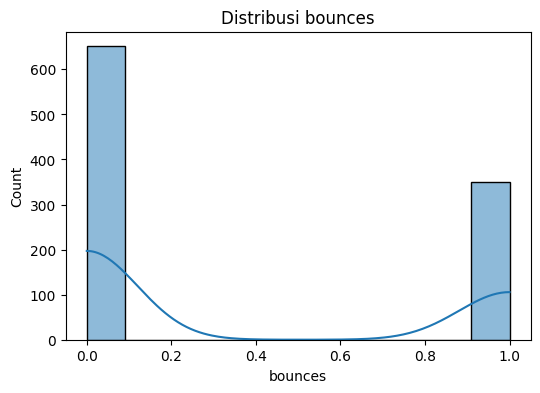

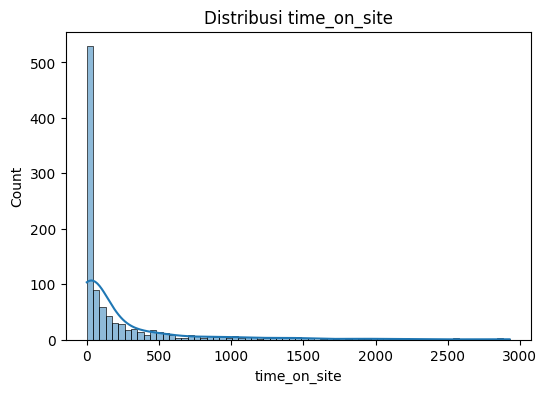

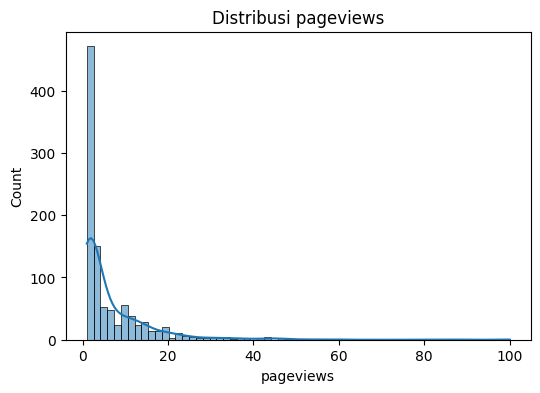

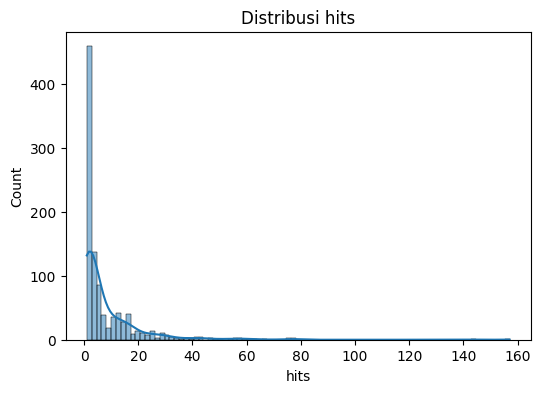

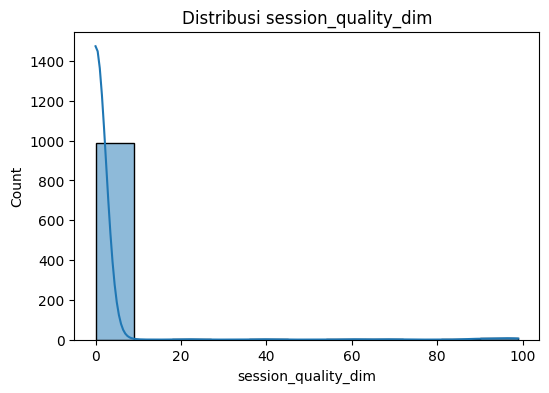

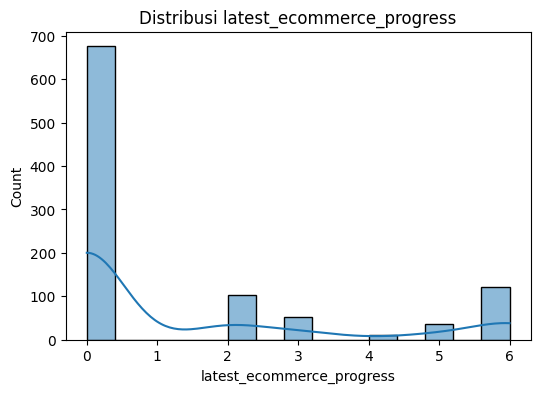

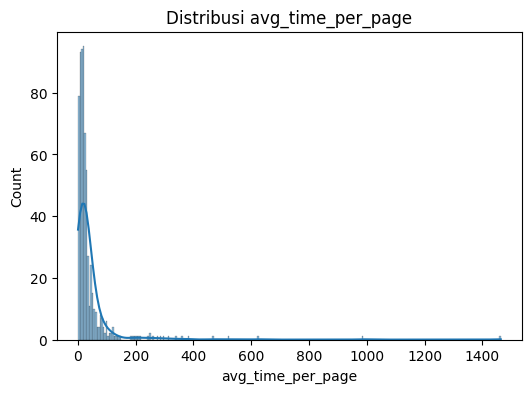

In [26]:
num_cols = ['bounces', 'time_on_site', 'pageviews', 'hits',
            'session_quality_dim', 'latest_ecommerce_progress', 'avg_time_per_page']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_test, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

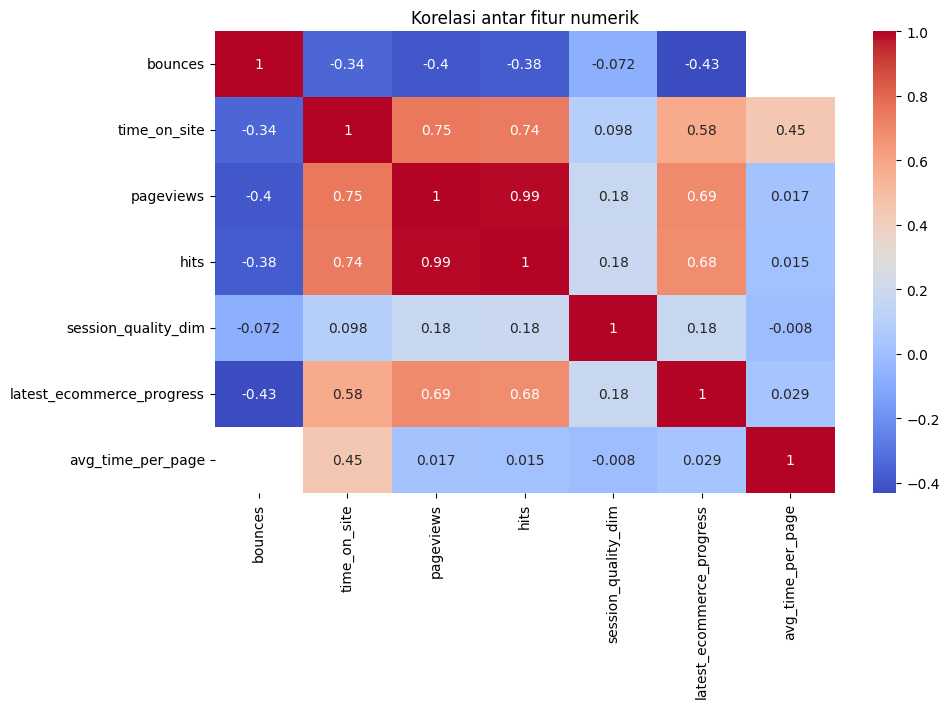

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

## Data Preprocessing

In [28]:
# mengisi kekosongan operatingSystem dengan modus
df['operatingSystem'].fillna(df['operatingSystem'].mode()[0], inplace=True)
df_test['operatingSystem'].fillna(df_test['operatingSystem'].mode()[0], inplace=True)

<ipython-input-28-d6d8fc589bbc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['operatingSystem'].fillna(df['operatingSystem'].mode()[0], inplace=True)
<ipython-input-28-d6d8fc589bbc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [29]:
df['medium'] = df['medium'].fillna('missing')
df['city'] = df['city'].fillna('missing')
df_test['medium'] = df_test['medium'].fillna('missing')
df_test['city'] = df_test['city'].fillna('missing')
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    4000 non-null   int64  
 1   time_on_site               4000 non-null   int64  
 2   pageviews                  4000 non-null   int64  
 3   hits                       4000 non-null   int64  
 4   session_quality_dim        4000 non-null   int64  
 5   latest_ecommerce_progress  4000 non-null   int64  
 6   avg_time_per_page          2724 non-null   float64
 7   source                     4000 non-null   object 
 8   medium                     4000 non-null   object 
 9   channelGrouping            4000 non-null   object 
 10  deviceCategory             4000 non-null   object 
 11  operatingSystem            4000 non-null   object 
 12  browser                    4000 non-null   object 
 13  country                    4000 non-null   objec

In [30]:
dataset = [df,df_test]

for data in dataset:
    data['avg_time_per_page'].fillna(data['avg_time_per_page'].median(), inplace=True)

# # impute with rainforest
# for data in dataset:
#     df_missing = data[data["avg_time_per_page"].isnull()]
#     df_not_missing = data[data["avg_time_per_page"].notnull()]

#     # df_missing.head()
#     # df_not_missing.head()

#     # 2. Pilih fitur prediktor (exclude kolom target dan yg terlalu berkorelasi)
#     features = ['bounces', 'time_on_site', 'pageviews', 'hits',
#                 'session_quality_dim', 'latest_ecommerce_progress']

#     rf = RandomForestRegressor(random_state=42)
#     rf.fit(df_not_missing[features], df_not_missing['avg_time_per_page'])

#     predicted_values = rf.predict(df_missing[features])

#     data.loc[data['avg_time_per_page'].isnull(), 'avg_time_per_page'] = predicted_values
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    4000 non-null   int64  
 1   time_on_site               4000 non-null   int64  
 2   pageviews                  4000 non-null   int64  
 3   hits                       4000 non-null   int64  
 4   session_quality_dim        4000 non-null   int64  
 5   latest_ecommerce_progress  4000 non-null   int64  
 6   avg_time_per_page          4000 non-null   float64
 7   source                     4000 non-null   object 
 8   medium                     4000 non-null   object 
 9   channelGrouping            4000 non-null   object 
 10  deviceCategory             4000 non-null   object 
 11  operatingSystem            4000 non-null   object 
 12  browser                    4000 non-null   object 
 13  country                    4000 non-null   objec

<ipython-input-30-1e1b837fd461>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_time_per_page'].fillna(data['avg_time_per_page'].median(), inplace=True)


In [31]:
# encode "city"
city_target_mean = df.groupby('city')['will_buy_on_return_visit'].mean()
df['city_encoded'] = df['city'].map(city_target_mean)
df_test['city_encoded'] = df['city'].map(city_target_mean)
global_mean = df['will_buy_on_return_visit'].mean()
df_test['city_encoded'] = df_test['city'].map(city_target_mean).fillna(global_mean)

# encode categorial feautures
label_cols = ['source', 'medium', 'channelGrouping', 'deviceCategory',
              'operatingSystem', 'browser', 'country']

dataset = [df, df_test]

for col in label_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[f'{col}_encoded'] = le.transform(df[col])
    df_test[f'{col}_encoded'] = df_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# df.drop(columns=['city'] + label_cols, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    4000 non-null   int64  
 1   time_on_site               4000 non-null   int64  
 2   pageviews                  4000 non-null   int64  
 3   hits                       4000 non-null   int64  
 4   session_quality_dim        4000 non-null   int64  
 5   latest_ecommerce_progress  4000 non-null   int64  
 6   avg_time_per_page          4000 non-null   float64
 7   source                     4000 non-null   object 
 8   medium                     4000 non-null   object 
 9   channelGrouping            4000 non-null   object 
 10  deviceCategory             4000 non-null   object 
 11  operatingSystem            4000 non-null   object 
 12  browser                    4000 non-null   object 
 13  country                    4000 non-null   objec

In [32]:
# target
y = df['will_buy_on_return_visit']

feature_cols = [
    'bounces',
    'time_on_site',
    'pageviews',
    'hits',
    'session_quality_dim',
    'latest_ecommerce_progress',
    'avg_time_per_page',
    'city_encoded',
    'source_encoded',
    'medium_encoded',
    'channelGrouping_encoded',
    'deviceCategory_encoded',
    'operatingSystem_encoded',
    'browser_encoded',
    'country_encoded'
]

# feature
X = df[feature_cols]

# train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

# akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.91875

Confusion Matrix:
[[365  42]
 [ 23 370]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       407
           1       0.90      0.94      0.92       393

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [35]:
print(df['will_buy_on_return_visit'].value_counts(normalize=True))

will_buy_on_return_visit
1    0.50225
0    0.49775
Name: proportion, dtype: float64


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    1000 non-null   int64  
 1   time_on_site               1000 non-null   int64  
 2   pageviews                  1000 non-null   int64  
 3   hits                       1000 non-null   int64  
 4   session_quality_dim        1000 non-null   int64  
 5   latest_ecommerce_progress  1000 non-null   int64  
 6   avg_time_per_page          1000 non-null   float64
 7   source                     1000 non-null   object 
 8   medium                     1000 non-null   object 
 9   channelGrouping            1000 non-null   object 
 10  deviceCategory             1000 non-null   object 
 11  operatingSystem            1000 non-null   object 
 12  browser                    1000 non-null   object 
 13  country                    1000 non-null   object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bounces                    4000 non-null   int64  
 1   time_on_site               4000 non-null   int64  
 2   pageviews                  4000 non-null   int64  
 3   hits                       4000 non-null   int64  
 4   session_quality_dim        4000 non-null   int64  
 5   latest_ecommerce_progress  4000 non-null   int64  
 6   avg_time_per_page          4000 non-null   float64
 7   source                     4000 non-null   object 
 8   medium                     4000 non-null   object 
 9   channelGrouping            4000 non-null   object 
 10  deviceCategory             4000 non-null   object 
 11  operatingSystem            4000 non-null   object 
 12  browser                    4000 non-null   object 
 13  country                    4000 non-null   objec

In [38]:
feature_cols = [
    'bounces',
    'time_on_site',
    'pageviews',
    'hits',
    'session_quality_dim',
    'latest_ecommerce_progress',
    'avg_time_per_page',
    'city_encoded',
    'source_encoded',
    'medium_encoded',
    'channelGrouping_encoded',
    'deviceCategory_encoded',
    'operatingSystem_encoded',
    'browser_encoded',
    'country_encoded'
]

X = df[feature_cols]
y = df['will_buy_on_return_visit']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

X_test_final = df_test[feature_cols]
y_pred = model.predict(X_test_final)

submission = pd.read_csv('/content/sample_submission.csv')
submission['will_buy_on_return_visit'] = y_pred
submission.to_csv('my_submission.csv', index=False)